# Clasificación de enfermedades en hojas de arroz

**Integrantes:**

Luisa Fernanda Pabón Jaimes 2130085

Adriana Villamizar Vera  2190033

Grupo: H2-J1

IA1

2022

## Introducción

El arroz es uno de los alimentos de mayor consumo en diferentes países del mundo, y como todos los cultivos, sufre de ciertas enfermedades que pueden perjudicar la producción del mismo, por ello se plantea construir un clasificador de dichas enfermedades a partir de imágenes de hojas de arroz.

En este proyecto se realizan pruebas con diferentes métodos de clasificación con el fin de implementar un modelo con el que se obtengan los mejores resultados y así poder clasificar las imágenes según su tipo de enfermedad.

## Desarrollo

In [ ]:
#@title 1. Montar el drive { display-mode: "form" }
import os
from google.colab import drive

path_ai = "/Proyecto IA1" #@param {type:"string"}
path = "/content/drive/My Drive" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Proyecto IA1


In [ ]:
#@title 2. Cargar las librerías { display-mode: "form" }


import numpy as np 
import cv2
import os
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten, Dropout, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *
from PIL import Image
from google.colab.patches import cv2_imshow

## 3. Importación del dataset 

In [ ]:
datagen = ImageDataGenerator(
        rescale=1./255)

train_imgs = datagen.flow_from_directory(
        directory = '/content/drive/My Drive/Proyecto IA1/rice_leaf_diseases_complete',
        target_size=(128, 128),
        batch_size=10,
        class_mode='binary')


Found 120 images belonging to 3 classes.


Se verifica la importación del dataset, obteniendo las clases de enfermedades contenidas en cada carpeta.

In [ ]:
base_dir =  r'/content/drive/My Drive/Proyecto IA1/rice_leaf_diseases_complete'
folders = os.listdir(base_dir)
print(folders)

['Bacterial leaf blight', 'Leaf smut', 'Brown spot']


Se guardan en variables las imagenes correspondientes a cada clase y se verifican la cantidad de imagenes de cada una

In [ ]:
bacterial = sorted(os.listdir(base_dir +'/Bacterial leaf blight'))
brownSpot =  sorted(os.listdir(base_dir +'/Brown spot'))
leafSmut = sorted(os.listdir(base_dir +'/Leaf smut'))
#Cantidad de imágenes que se tienen de cada clase
print("cantidad de imágenes:")
print("Bacterial leaf blight :",len(bacterial))
print("Brown spot :",len(brownSpot))
print("Leaf smut:",len(leafSmut))

cantidad de imágenes:
Bacterial leaf blight : 40
Brown spot : 40
Leaf smut: 40


## 4. Tratamiento inicial a las imágenes

Se ajustan las dimensiones de las imágenes a 128 por 128 y se pasan a escala de grises, además, se crean las listas con las imágenes y sus respectivas etiquetas. 
Las etiquetas para cada clase de enfermedad se representan por números de la siguiente forma:

0: Bacterial leaf blight

1: Leaf smut

2: Brown spot

In [ ]:
data = [] #X
labels = []#y
clases = [bacterial,  leafSmut, brownSpot,]
i= 0
for c in clases:
  for k in c:
    img = cv2.imread(base_dir + '/'+folders[i]+'/' + k)
    gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gris = cv2.resize(gris, (128, 128))
    data.append(gris.flatten())
    labels.append(i)
  i=i+1

Se pasa data y labels a arrays y se normalizan las imágenes

In [ ]:
imgs = np.array(data)
labels = np.array(labels)
imgs = imgs.astype(np.float32)
labels = labels.astype(np.int32)
imgs = imgs/255

Se permuta el dataset para que los datos queden mezclados

In [ ]:
p = np.random.permutation(range(len(imgs)))
imgs = imgs[p]
labels = labels[p]

## 5. División del dataset

Se divide el dataset en 80% para entrenamiento y 20% para test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size = 0.2, random_state = 21)

## 6. Pruebas con clasificadores

**Random forest classifier**

Se hacen pruebas con el clasificador RandomForestClassifier variando la profundidad y se grafica para ver los mejores resultados posibles.

In [ ]:
def resultados_rfc(data, labels):
    import numpy as np
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    list_avg =[]
    list_std = []
    
    for i in range(1, 11, 1):
      est = RandomForestClassifier(max_depth=i, n_estimators=9, random_state=21)
      s = cross_val_score(est, data, labels, cv=KFold(10, shuffle=False), scoring=make_scorer(accuracy_score))
      list_avg.append(np.mean(s))
      list_std.append(np.std(s))

    return list_avg, list_std

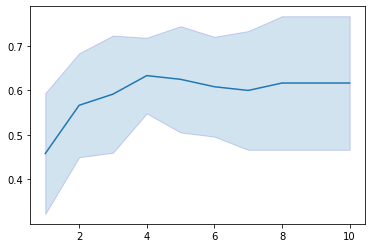

In [ ]:
#Graficar los resultados variando la profundidad del clasificador
avg, std = resultados_rfc(imgs, labels)
plt.plot(range(1, 11, 1), avg)
plt.fill_between(range(1, 11, 1), np.array(avg)-np.array(std), np.array(avg)+np.array(std), alpha=0.2, edgecolor='#1B2ACC')
plt.show()

In [ ]:
def rfc_var_depth(X_train, y_train, X_test, y_test):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    list_a = []
    for i in range(1, 21, 1):
      est = RandomForestClassifier(max_depth=i, n_estimators=9, random_state=21)
      est.fit(X_train,y_train)
      pred=est.predict(X_test)
      a = accuracy_score(pred, y_test)
      list_a.append(a)
    
    return list_a

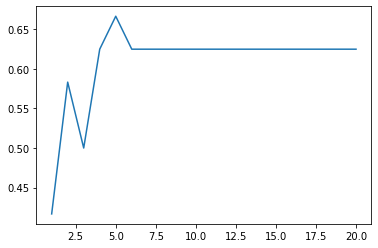

In [ ]:
#Graficar los resultados variando la profundidad del clasificador
accuracy = rfc_var_depth(X_train, y_train, X_test, y_test)
plt.plot(range(1, 21, 1), accuracy)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
est = RandomForestClassifier(max_depth=4, n_estimators=9, random_state=21)
est.fit(X_train,y_train)
pred=est.predict(X_test)
a = accuracy_score(pred, y_test)
print("Accuracy:")
print(a)

Accuracy:
0.625


Aproximadamente el mejor puntaje se obtiene con una profundidad de 4 y corresponde a un accuracy de 0.625.

**DecisionTreeClassifier**

Se hacen pruebas con el clasificador DecisionTreeClassifier variando la profundidad y se grafica para ver los mejores resultados posibles.

In [ ]:
def resultados_dtc(data, labels):
    import numpy as np
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    list_avg =[]
    list_std = []
    
    for i in range(1, 11, 1):
      est = DecisionTreeClassifier(max_depth=i, random_state=21)
      s = cross_val_score(est, data, labels, cv=KFold(10, shuffle=False), scoring=make_scorer(accuracy_score))
      list_avg.append(np.mean(s))
      list_std.append(np.std(s))

    return list_avg, list_std

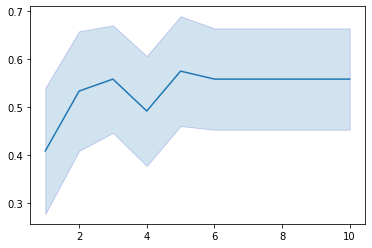

In [ ]:
#Graficar los resultados variando la profundidad del clasificador
avg, std = resultados_dtc(imgs, labels)
plt.plot(range(1, 11, 1), avg)
plt.fill_between(range(1, 11, 1), np.array(avg)-np.array(std), np.array(avg)+np.array(std), alpha=0.2, edgecolor='#1B2ACC')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
est = DecisionTreeClassifier(max_depth=5)
est.fit(X_train,y_train)
pred=est.predict(X_test)
a = accuracy_score(pred, y_test)
print("Accuracy:")
print(a)

Accuracy:
0.5833333333333334


El mejor puntaje se obtiene con una profundidad  aproximada de 5 y corresponde a un accuracy de 0.583.

**SVC**

Se hacen pruebas con un SVC variando los kernels y se grafica para ver los mejores resultados posibles.

[0.5416666666666666, 0.5833333333333334, 0.5833333333333334, 0.25]


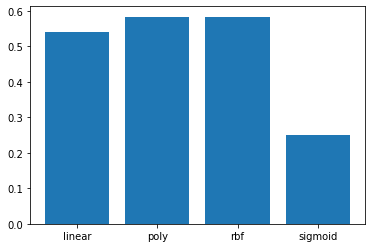

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
list_a = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    est = SVC(random_state=21, kernel=k)
    est.fit(X_train,y_train)
    pred=est.predict(X_test)
    a = accuracy_score(pred, y_test)
    list_a.append(a)
print(list_a)
plt.bar(kernels, list_a, width=0.8)
plt.show()

El mejor resultado se obtiene con los kernels poly y rbf y corresponde a un accuracy de 0.583






## 7. Pruebas con CNN

Para implementar un modelo con CNN se transforman las imágenes en escala RGB

In [ ]:
data_rgb = [] #X
labels_rgb = []#y
i= 0
for c in clases:
  for k in c:
    img = cv2.imread(base_dir + '/'+folders[i]+'/' + k)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (128, 128))
    data_rgb.append(img_resized)
    labels_rgb.append(i)
  i=i+1

Se pasan las imágenes y los labels a arrays

In [ ]:
imgs_rgb = np.array(data_rgb)
labels_rgb = np.array(labels_rgb)

In [ ]:

print('imagenes : {} | labels : {}'.format(imgs_rgb.shape , labels_rgb.shape))

imagenes : (120, 128, 128, 3) | labels : (120,)


A continuación se ilustran algunas imágenes

In [ ]:
def nombre_enfermedad(imagen):
  if imagen == 0: 
    nombre = 'Bacterial leaf blight'
  if imagen == 1: 
    nombre = 'Leaf smut'
  if imagen == 2: 
    nombre = 'Brown spot'
  return nombre

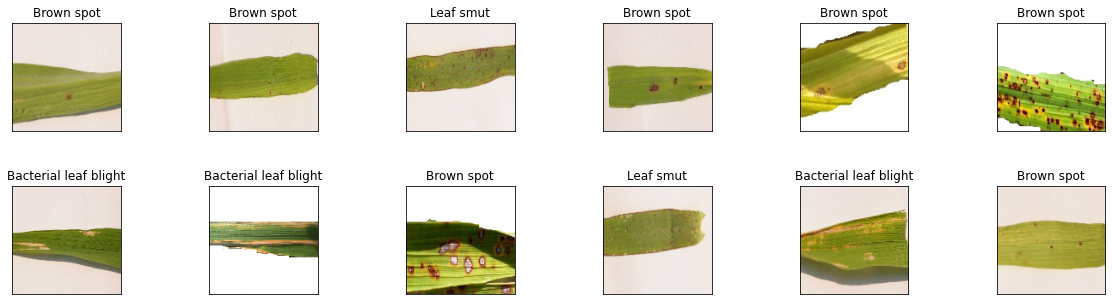

In [ ]:
plt.figure(1, figsize=(20,5))
n=0
for i in range(12):
  n += 1
  r = np.random.randint(0, imgs_rgb.shape[0], 1)
  plt.subplot(2, 6, n)
  plt.subplots_adjust(hspace = 0.5, wspace =0.5)
  plt.imshow(imgs_rgb[r[0]])
  plt.title('{}'.format(nombre_enfermedad(labels_rgb[r[0]]), labels_rgb[r[0]]))
  plt.xticks([]), plt.yticks([])

plt.show()

Se permuta el dataset para mezclar los datos

In [ ]:
p = np.random.permutation(range(len(imgs_rgb)))
imgs_rgb = imgs_rgb[p]
labels_rgb = labels_rgb[p]

Se divide el dataset en training y test

In [ ]:
from sklearn.model_selection import train_test_split
X_train_rgb, X_test_rgb, y_train_rgb, y_test_rgb = train_test_split(imgs_rgb, labels_rgb, test_size = 0.2, random_state = 21)

Se hace el reshape de la matriz de imágenes y one-hot-encoding

In [ ]:
X_train_rgb = X_train_rgb.reshape([-1, 128, 128, 3])
X_test_rgb = X_test_rgb.reshape([-1, 128, 128, 3])

X_train_rgb = X_train_rgb.astype('float32')
X_test_rgb = X_test_rgb.astype('float32')

y_test_rgb = tf.keras.utils.to_categorical(y_test_rgb)
y_train_rgb = tf.keras.utils.to_categorical(y_train_rgb) 

X_train_rgb /= 255
X_test_rgb /= 255
print('x_train shape:', X_train_rgb.shape)
print('Numero de imagenes en x_train', X_train_rgb.shape[0], "y_train:", y_train_rgb.shape)
print('Numero de imagenes in x_test', X_test_rgb.shape[0], "y_test: ", y_test_rgb.shape)

x_train shape: (96, 128, 128, 3)
Numero de imagenes en x_train 96 y_train: (96, 3)
Numero de imagenes in x_test 24 y_test:  (24, 3)


Planteamiento de modelo de CNN


Se crean 5 modelos de CNN, variando tamaño de kernerl, funciones de activación y algunas capas y se grafican sus accuracys y sus loss para comparar cuál es el mejor.

In [ ]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4), #capa para prevenir overfitting
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
model1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])

In [ ]:
history1 = model1.fit(X_train_rgb,y_train_rgb, batch_size = 64, epochs=40, verbose=1, shuffle=True,
          validation_data=(X_test_rgb, y_test_rgb))

Epoch 1/40
2/2 [==============================] - 5s 2s/step - loss: 9.6421 - accuracy: 0.3021 - val_loss: 1.5101 - val_accuracy: 0.2500
Epoch 2/40
2/2 [==============================] - 3s 1s/step - loss: 1.1018 - accuracy: 0.3229 - val_loss: 0.7357 - val_accuracy: 0.3333
Epoch 3/40
2/2 [==============================] - 3s 1s/step - loss: 0.7267 - accuracy: 0.3125 - val_loss: 0.6614 - val_accuracy: 0.3333
Epoch 4/40
2/2 [==============================] - 3s 1s/step - loss: 0.6594 - accuracy: 0.3750 - val_loss: 0.6733 - val_accuracy: 0.2500
Epoch 5/40
2/2 [==============================] - 3s 1s/step - loss: 0.6434 - accuracy: 0.3542 - val_loss: 0.6481 - val_accuracy: 0.2500
Epoch 6/40
2/2 [==============================] - 3s 1s/step - loss: 0.6013 - accuracy: 0.3646 - val_loss: 0.6210 - val_accuracy: 0.4583
Epoch 7/40
2/2 [==============================] - 3s 1s/step - loss: 0.5728 - accuracy: 0.4688 - val_loss: 0.6178 - val_accuracy: 0.4167
Epoch 8/40
2/2 [=========================

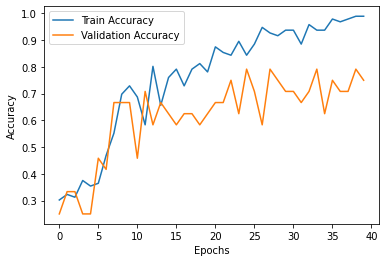

In [ ]:
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

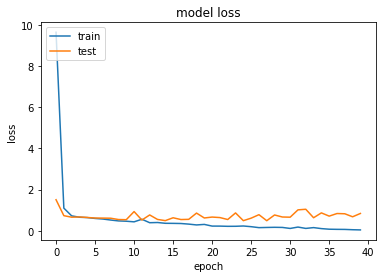

In [ ]:
plt.plot(history1.history['loss'])  
plt.plot(history1.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observación:** con 39 epochs se obtiene el mejor puntaje en accuracy (0.7917) y una pérdida alta en testeo (0.6813).

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4), #capa para prevenir overfitting
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)     

In [ ]:
model2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_train_rgb,y_train_rgb, batch_size = 64, epochs=40, verbose=1, shuffle=True,
          validation_data=(X_test_rgb, y_test_rgb))

Epoch 1/40
2/2 [==============================] - 4s 1s/step - loss: 0.6807 - accuracy: 0.3125 - val_loss: 0.6468 - val_accuracy: 0.4167
Epoch 2/40
2/2 [==============================] - 3s 1s/step - loss: 0.6578 - accuracy: 0.3333 - val_loss: 0.6377 - val_accuracy: 0.4167
Epoch 3/40
2/2 [==============================] - 3s 1s/step - loss: 0.6423 - accuracy: 0.4167 - val_loss: 0.6351 - val_accuracy: 0.4583
Epoch 4/40
2/2 [==============================] - 3s 1s/step - loss: 0.6386 - accuracy: 0.3854 - val_loss: 0.6338 - val_accuracy: 0.4583
Epoch 5/40
2/2 [==============================] - 3s 1s/step - loss: 0.6366 - accuracy: 0.3958 - val_loss: 0.6355 - val_accuracy: 0.3750
Epoch 6/40
2/2 [==============================] - 3s 1s/step - loss: 0.6363 - accuracy: 0.3542 - val_loss: 0.6354 - val_accuracy: 0.4583
Epoch 7/40
2/2 [==============================] - 3s 1s/step - loss: 0.6403 - accuracy: 0.3854 - val_loss: 0.6384 - val_accuracy: 0.2500
Epoch 8/40
2/2 [=========================

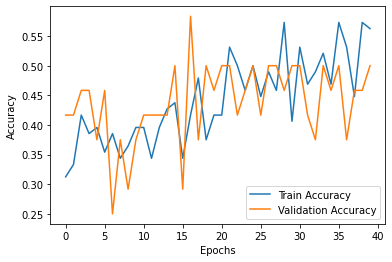

In [ ]:
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

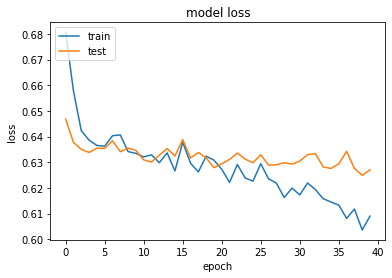

In [ ]:
plt.plot(history2.history['loss'])  
plt.plot(history2.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observación:** con 17 epochs se obtiene el mejor puntaje en accuracy (0.5833), pero la pérdida es alta (0.6293) y en general, el puntaje de loss es alto.

In [ ]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (5,5),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 58, 58, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 128)       204928    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 128)     

In [ ]:
model3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

In [ ]:
history3 = model3.fit(X_train_rgb,y_train_rgb, batch_size = 64, epochs=40, verbose=1, shuffle=True,
          validation_data=(X_test_rgb, y_test_rgb))

Epoch 1/40
2/2 [==============================] - 6s 2s/step - loss: 0.6854 - accuracy: 0.3125 - val_loss: 0.6729 - val_accuracy: 0.3333
Epoch 2/40
2/2 [==============================] - 6s 2s/step - loss: 0.6696 - accuracy: 0.3646 - val_loss: 0.6616 - val_accuracy: 0.2500
Epoch 3/40
2/2 [==============================] - 6s 2s/step - loss: 0.6580 - accuracy: 0.3854 - val_loss: 0.6515 - val_accuracy: 0.4167
Epoch 4/40
2/2 [==============================] - 6s 2s/step - loss: 0.6489 - accuracy: 0.3750 - val_loss: 0.6439 - val_accuracy: 0.5000
Epoch 5/40
2/2 [==============================] - 6s 2s/step - loss: 0.6422 - accuracy: 0.4167 - val_loss: 0.6408 - val_accuracy: 0.3750
Epoch 6/40
2/2 [==============================] - 6s 2s/step - loss: 0.6376 - accuracy: 0.4375 - val_loss: 0.6398 - val_accuracy: 0.2500
Epoch 7/40
2/2 [==============================] - 6s 2s/step - loss: 0.6350 - accuracy: 0.3646 - val_loss: 0.6378 - val_accuracy: 0.2917
Epoch 8/40
2/2 [=========================

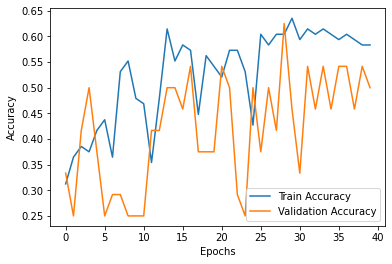

In [ ]:
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

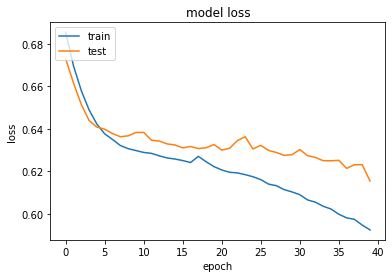

In [ ]:
plt.plot(history3.history['loss'])  
plt.plot(history3.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observación:** con 29 epochs se obtiene el mejor puntaje en accuracy (0.6250) pero la pérdida es significativa (0.6275) y este patrón se mantiene.

In [ ]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (5,5),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4), #capa para prevenir overfitting
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 58, 58, 64)        51264     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 29, 29, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 25, 25, 128)       204928    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 128)     

In [ ]:
model4.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

In [ ]:
history4 = model4.fit(X_train_rgb,y_train_rgb, batch_size = 64, epochs=40, verbose=1, shuffle=True,
          validation_data=(X_test_rgb, y_test_rgb))

Epoch 1/40
2/2 [==============================] - 6s 2s/step - loss: 0.7048 - accuracy: 0.2917 - val_loss: 0.6642 - val_accuracy: 0.4167
Epoch 2/40
2/2 [==============================] - 6s 2s/step - loss: 0.6675 - accuracy: 0.3333 - val_loss: 0.6467 - val_accuracy: 0.4167
Epoch 3/40
2/2 [==============================] - 6s 2s/step - loss: 0.6541 - accuracy: 0.3021 - val_loss: 0.6392 - val_accuracy: 0.4167
Epoch 4/40
2/2 [==============================] - 6s 2s/step - loss: 0.6449 - accuracy: 0.2604 - val_loss: 0.6344 - val_accuracy: 0.4167
Epoch 5/40
2/2 [==============================] - 6s 2s/step - loss: 0.6440 - accuracy: 0.3125 - val_loss: 0.6398 - val_accuracy: 0.2500
Epoch 6/40
2/2 [==============================] - 6s 2s/step - loss: 0.6380 - accuracy: 0.4167 - val_loss: 0.6409 - val_accuracy: 0.2500
Epoch 7/40
2/2 [==============================] - 6s 2s/step - loss: 0.6277 - accuracy: 0.4062 - val_loss: 0.6365 - val_accuracy: 0.3333
Epoch 8/40
2/2 [=========================

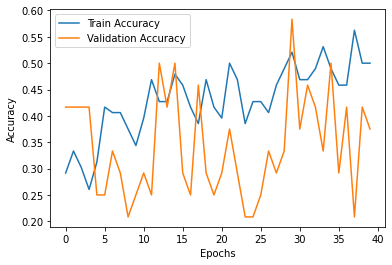

In [ ]:
plt.plot(history4.history['accuracy'], label='Train Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

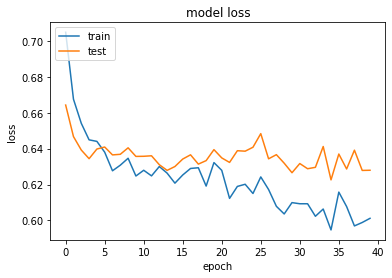

In [ ]:
plt.plot(history4.history['loss'])  
plt.plot(history4.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observación:** con 30 epochs se obtiene el mejor puntaje en accuracy (0.5833) pero la pérdida es significativa (0.6266) y este patrón se mantiene.

In [ ]:
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4), #capa para prevenir overfitting
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 128)     

In [ ]:
model5.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])

In [ ]:
history5 = model5.fit(X_train_rgb,y_train_rgb, batch_size = 64, epochs=40, verbose=1, shuffle=True,
          validation_data=(X_test_rgb, y_test_rgb))

Epoch 1/40
2/2 [==============================] - 4s 1s/step - loss: 7.4005 - accuracy: 0.3021 - val_loss: 0.9963 - val_accuracy: 0.5417
Epoch 2/40
2/2 [==============================] - 3s 1s/step - loss: 0.8569 - accuracy: 0.5104 - val_loss: 1.6852 - val_accuracy: 0.2500
Epoch 3/40
2/2 [==============================] - 3s 1s/step - loss: 1.1796 - accuracy: 0.3542 - val_loss: 0.6696 - val_accuracy: 0.4583
Epoch 4/40
2/2 [==============================] - 3s 1s/step - loss: 0.6775 - accuracy: 0.4167 - val_loss: 0.6794 - val_accuracy: 0.4167
Epoch 5/40
2/2 [==============================] - 3s 1s/step - loss: 0.6819 - accuracy: 0.3438 - val_loss: 0.6657 - val_accuracy: 0.3333
Epoch 6/40
2/2 [==============================] - 3s 1s/step - loss: 0.6599 - accuracy: 0.3750 - val_loss: 0.6440 - val_accuracy: 0.2500
Epoch 7/40
2/2 [==============================] - 3s 1s/step - loss: 0.6222 - accuracy: 0.4062 - val_loss: 0.6351 - val_accuracy: 0.5000
Epoch 8/40
2/2 [=========================

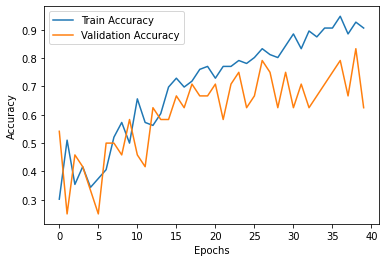

In [ ]:
plt.plot(history5.history['accuracy'], label='Train Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

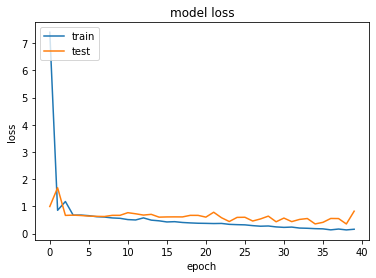

In [ ]:
plt.plot(history5.history['loss'])  
plt.plot(history5.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observación:** con 39 epochs se obtiene el mejor puntaje en accuracy (0.8333) y la pérdida es de 0.3546.

Comparando los resultados obtenidos de los 5 modelos y los clasificadores (RandomForestClassifier, DecesisionTreeClassifier y SVM) se escoje como modelo final el que obtuvo mayor puntaje de accuracy  con un loss bajo, esto es el Modelo 5 de CNN con 39 epochs, obteniendo un accuracy de 0.8333 y un loss de 0.3546


## 8. Pruebas

In [ ]:
def clasificador(indice):
  probs = model5.predict(X_test_rgb)
  pred = np.argmax(probs, axis=1)
  enfermedad = nombre_enfermedad(pred[indice])
  plt.imshow(X_test_rgb[[indice][0]])
  print("Enfermedad (dada por el clasificador): ")
  print(enfermedad)
  enfermedad_re = nombre_enfermedad(np.argmax(y_test_rgb[indice]))
  print("Enfermedad real: ")
  print(enfermedad_re) 


Enfermedad (dada por el clasificador): 
Brown spot
Enfermedad real: 
Brown spot


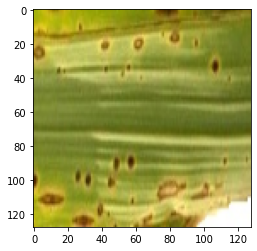

In [ ]:
clasificador(0)

Enfermedad (dada por el clasificador): 
Bacterial leaf blight
Enfermedad real: 
Bacterial leaf blight


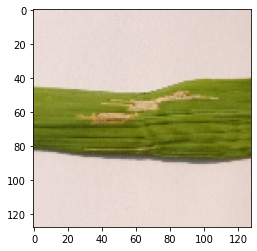

In [ ]:
clasificador(10)

Enfermedad (dada por el clasificador): 
Leaf smut
Enfermedad real: 
Leaf smut


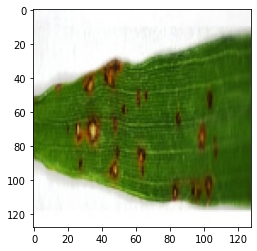

In [ ]:
clasificador(23)